In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
dep = np.arange(1, 11, 1, dtype = int)

In [3]:
nseeds = 10

In [4]:
with open('noiseless_COBY_rand_runs.pkl', 'rb') as file:
    yruns = pickle.load(file)

In [5]:
with open('noiseless_COBY_rand_list.pkl', 'rb') as file:
    ylist = pickle.load(file)

In [6]:
res_data_mean = []
res_data_std = []
val_list = []

In [7]:
for gt in dep:
    yran = np.array(yruns['%s'%gt])
    ylis = np.array(ylist['%s'%gt])
    # Compute mean and standard deviation across runs
    mean_y = np.mean(yran, axis=0)
    std_y = np.std(yran, axis=0)
    val = np.mean(ylis, axis=0)
    res_data_mean.append(mean_y)
    res_data_std.append(std_y)
    val_list.append(val)

In [8]:
# Define exponential model
def exp_model(x, a, b):
    return a * np.exp(-b * x)

C:\Users\cqtv201\AppData\Local\Temp\ipykernel_5700\2599236198.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\cqtv201\AppData\Local\Temp\ipykernel_5700\2599236198.py:3: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


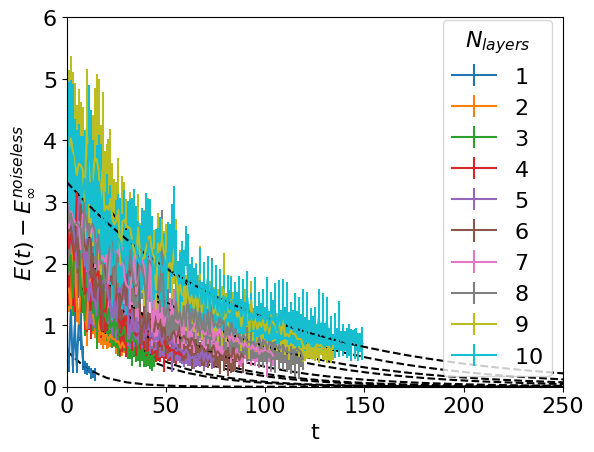

In [9]:
#fitting using the mean data with error propagation
plt.rcParams.update({'font.size': 16})
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
gam = []
gam_err = []
xx = np.arange(0, 25000, 1, dtype = int)
fit_ran = 15
for gt in range(0, len(res_data_mean), 1):
    fit_range = (gt+1)*fit_ran
    yy = np.array(res_data_mean[gt])-val_list[gt]
    xp = xx[0:fit_range]
    yp = yy[0:fit_range]
    std_devs = res_data_std[gt][0:fit_range]

    # Fit model with weights
    params, cv = curve_fit(exp_model, xp, yp, sigma=std_devs, absolute_sigma=True)
    a, b = params
    a_err, b_err = np.sqrt(np.diag(cv))
    gam_err.append(b_err)
    gam.append(b)
    #y_fit = exp_model(xp, a, b)

    plt.errorbar(xp, yp, yerr=std_devs, fmt='-', label = r'$%s$' %(gt+1))

    # Plot fitted exponential model
    x_fit = np.linspace(0, 1000, 100)
    y_fit = exp_model(x_fit, a, b)
    #plt.plot(x_fit, y_fit, label= r'$F~%s~Layer$' %(gt+1))
    plt.plot(x_fit, y_fit, '--k')

#ax.set_yscale('log')
ax.set_xlabel('t')
ax.set_ylabel(r'$ E(t) - E_{\infty}^{noiseless}$')
plt.axis([0, 250, 0, 6])
#ax.legend(ncol = 2, bbox_to_anchor = (1, 0.1))
ax.legend(ncol = 1, title = r'$N_{layers}$')
#plt.savefig('noiseless_E_t.pdf', bbox_inches = 'tight')
plt.show()

In [17]:
gate_ct = np.array([94, 178, 262, 346, 430, 514, 598, 682, 766, 850], dtype = int) #934

In [18]:
gate_ct

array([ 94, 178, 262, 346, 430, 514, 598, 682, 766, 850])

In [24]:
n_lay = 10

In [25]:
# Define exponential model
def exp_model(x, a, b):
    return a * np.exp(b * x)

In [26]:
# Define linear model
def lin_model(x, b, a):
    return b*x + a

In [27]:
gam

[0.06975251429374409,
 0.03283329527706413,
 0.032665818052024106,
 0.026324033104005617,
 0.024633824818604395,
 0.020824259455424175,
 0.016954398201474544,
 0.014742232734345606,
 0.013921351016856036,
 0.010907267647096808]

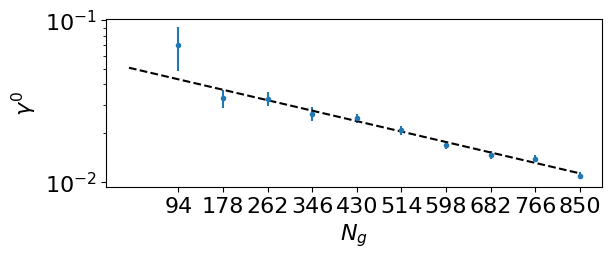

In [28]:
#fitting exponential on noiseless gamma
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
plt.errorbar(gate_ct[0:n_lay], gam[0:n_lay], yerr=gam_err[0:n_lay], fmt='.')
#pfit, cv  = np.polyfit(gate_ct[0:n_lay], np.log(gam[0:n_lay]), w = 1/np.sqrt(gam_err[0:n_lay]), deg=1, cov = True)

#a, b = pfit

#Fit model with weights
#pm, cv = curve_fit(exp_model, gate_ct[0:n_lay], gam[0:n_lay], sigma=gam_err[0:n_lay], absolute_sigma=True)
pm, cv = curve_fit(lin_model, gate_ct[0:n_lay], np.log(gam[0:n_lay]), sigma=np.divide(np.array(gam_err[0:n_lay]), np.array(gam[0:n_lay])), absolute_sigma=True)

b, a = pm
b_err, a_err = np.sqrt(np.diag(cv))
#a_err = a_err*np.exp(pfit[1])
#a_err = a_err*a
a_err = a_err*np.exp(a)

#y_fitt = exp_model(gate_ct[0:n_lay], a, b)
y_fitt = exp_model(gate_ct[0:n_lay], np.exp(a), b)

residuals = np.array(gam[0:n_lay]) - y_fitt
chi_sq = np.sum(np.divide(residuals, np.array(gam_err[0:n_lay])))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((np.array(gam[0:n_lay])-np.mean(np.array(gam[0:n_lay])))**2)
r_sq = 1 - (ss_res / ss_tot)

#Plot fitted exponential model
x_fit = np.linspace(1, gate_ct[n_lay-1], 100)
y_fit = exp_model(x_fit, np.exp(a), b)
#plt.plot(x_fit, y_fit)

# Create sequence of 100 numbers from 0 to 100 
#xn = np.linspace(1, gate_ct[n_lay-1], num=50)

# Plot regression line
ax.plot(x_fit, y_fit, "--k", lw=1.5)
#ax.plot(xn, np.exp(pfit[1])*np.exp(pfit[0]*xn), '--k', lw=1.5);
ax.set_xlabel(r'$N_g$')
ax.set_xticks(gate_ct)
ax.set_ylabel(r'$ \gamma^0$')
#plt.savefig('noiseless_gamma_fit.pdf', bbox_inches = 'tight')
ax.set_yscale('log')
plt.show()

In [322]:
chi_sq

-16.049489831718198

In [323]:
r_sq

0.19071623413406125

In [324]:
np.exp(pfit[1])

0.020716541763867478

In [325]:
pfit[0]

-0.0012100658450703858

In [298]:
cv

array([[ 1.15092074e-09, -8.11106328e-07],
       [-8.11106328e-07,  6.21556971e-04]])

In [299]:
b_err

3.392522280023635e-05

In [300]:
a_err

0.0007041579120949632

In [302]:
# Define power law
def power_model(x, a, b):
    return a * ((x)**b)

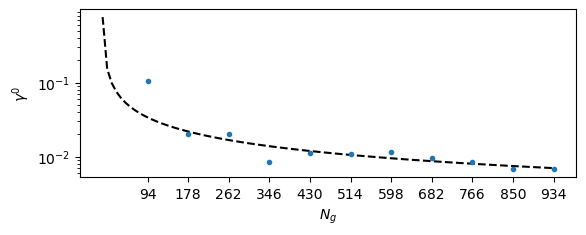

In [303]:
#fitting exponential on noiseless gamma
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
plt.errorbar(gate_ct[0:n_lay], gam[0:n_lay], yerr=gam_err[0:n_lay], fmt='.')
#pfit, cv  = np.polyfit(gate_ct[0:n_lay], np.log(gam[0:n_lay]), w = 1/np.sqrt(gam_err[0:n_lay]), deg=1, cov = True)

#Fit model with weights
pm, cv = curve_fit(power_model, gate_ct[0:n_lay], gam[0:n_lay], sigma=gam_err[0:n_lay], absolute_sigma=True)
a, b = pm
a_err, b_err = np.sqrt(np.diag(cv))
#Plot fitted exponential model
x_fit = np.linspace(1, gate_ct[n_lay-1], 100)
y_fit = power_model(x_fit, a, b)
#plt.plot(x_fit, y_fit)

y_fitt = power_model(gate_ct[0:n_lay], a, b)

residuals = np.array(gam[0:n_lay]) - y_fitt
chi_sq = np.sum(np.divide(residuals, np.array(gam_err[0:n_lay])))
ss_res = np.sum(residuals**2)
ss_tot = np.sum(( np.array(gam[0:n_lay])-np.mean( np.array(gam[0:n_lay])))**2)
r_sq = 1 - (ss_res / ss_tot)

# Create sequence of 100 numbers from 0 to 100 
#xn = np.linspace(1, gate_ct[n_lay-1], num=50)

# Plot regression line
ax.plot(x_fit, y_fit, '--k', lw=1.5);
ax.set_xlabel(r'$N_g$')
ax.set_xticks(gate_ct)
ax.set_ylabel(r'$ \gamma^0$')
#plt.savefig('noiseless_gamma_fit.pdf', bbox_inches = 'tight')
ax.set_yscale('log')
plt.show()

In [304]:
chi_sq

10.120154373458332

In [305]:
r_sq

0.3709261407206855

In [306]:
a

0.7715434036739793

In [307]:
b

-0.6873773589084222

In [308]:
a_err

0.09742358689632695

In [309]:
b_err

0.019360559031330007

In [310]:
# Define denom model
def denom_model(x, a, b):
    return a/(1 + (x)*b)

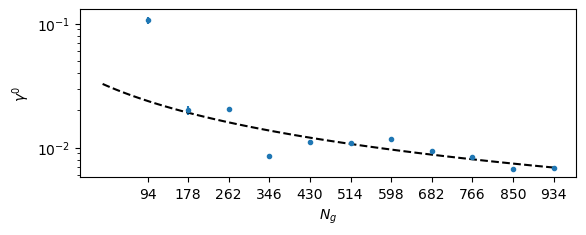

In [312]:
#fitting exponential on noiseless gamma
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
plt.errorbar(gate_ct[0:n_lay], gam[0:n_lay], yerr=gam_err[0:n_lay], fmt='.')

#Fit model with weights
pm, cv = curve_fit(denom_model, gate_ct[0:n_lay], gam[0:n_lay], sigma=gam_err[0:n_lay], absolute_sigma=True)
a, b = pm
a_err, b_err = np.sqrt(np.diag(cv))
#Plot fitted exponential model
x_fit = np.linspace(1, gate_ct[n_lay-1], 100)
y_fit = denom_model(x_fit, a, b)
#plt.plot(x_fit, y_fit)

y_fitt = denom_model(gate_ct[0:n_lay], a, b)

residuals = np.array(gam[0:n_lay]) - y_fitt
chi_sq = np.sum(np.divide(residuals, np.array(gam_err[0:n_lay])))
ss_res = np.sum(residuals**2)
ss_tot = np.sum(( np.array(gam[0:n_lay])-np.mean( np.array(gam[0:n_lay])))**2)
r_sq = 1 - (ss_res / ss_tot)


# Plot regression line
ax.plot(x_fit, y_fit, '--k', lw=1.5);
ax.set_xlabel(r'$N_g$')
ax.set_xticks(gate_ct)
ax.set_ylabel(r'$ \gamma^0$')
#plt.savefig('noiseless_gamma_fit.pdf', bbox_inches = 'tight')
ax.set_yscale('log')
plt.show()

In [313]:
r_sq

0.18468794308402126

In [314]:
chi_sq

12.797162391964628

In [315]:
a

0.0328558159377693

In [316]:
b

0.004001249943154224

In [317]:
a_err

0.00225039118114244

In [318]:
b_err

0.0003759268430840319

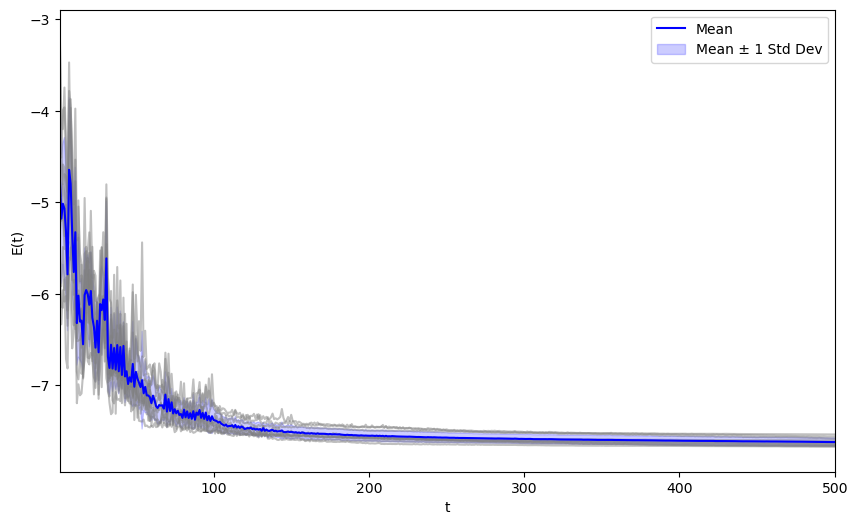

In [42]:
# Plotting
x = np.arange(1, 25001, 1, dtype = int)
plt.figure(figsize=(10, 6))

# Plot each individual run
for i in range(nseeds):
    plt.plot(x, yruns['5'][i], color='gray', alpha=0.5)

# Plot the mean line
plt.plot(x, res_data_mean[4], color='b', label='Mean')
# Compute upper and lower bounds for shading
upper_bound = res_data_mean[4] + res_data_std[4]
lower_bound = res_data_mean[4] - res_data_std[4]
# Add shading for the range (mean ± std)
plt.fill_between(x, lower_bound, upper_bound, color='blue', alpha=0.2, label='Mean ± 1 Std Dev')

plt.xlim([1,500])
# Add labels and legend
plt.xlabel('t')
plt.ylabel('E(t)')
#plt.title('Shaded Time Series Plot')
plt.legend()
plt.savefig('noiseless_times.pdf', bbox_inches = 'tight')
# Show plot
plt.show()

In [39]:
val_list

[-6.86877423236628,
 -7.5073256953633045,
 -7.630929101823497,
 -7.701978031151841,
 -7.711535128131892,
 -7.711258540803937,
 -7.711384764984594,
 -7.711487192761773,
 -7.711516798650874,
 -7.7115369631347646]